<a href="https://www.kaggle.com/code/arvio25/recommendation-system-for-amazon-products?scriptVersionId=159146533" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [111]:
df = pd.read_csv('/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv', names=['userId', 'productId','Rating','timestamp'])

In [112]:
df

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [113]:
df = df.drop(['timestamp'], axis=1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [116]:
popular = pd.DataFrame(df.groupby('productId')['Rating'].count())
top = popular.sort_values('Rating', ascending=False)
top.head(10)

,Rating
productId,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
B003ELYQGG,11617
B003ES5ZUU,10276
B007R5YDYA,9907
B00622AG6S,9823


<Axes: xlabel='productId'>

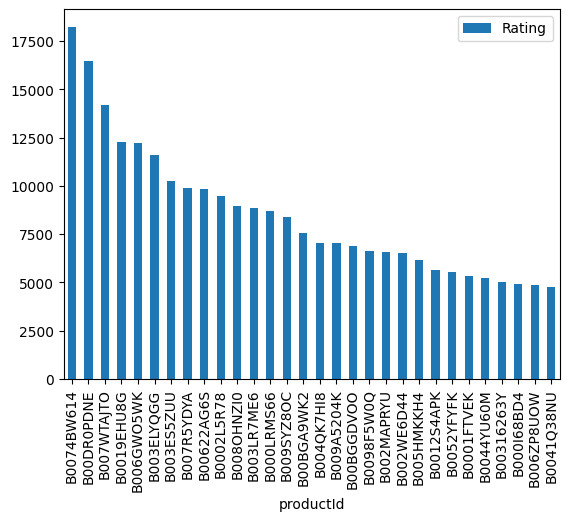

In [117]:
top.head(30).plot(kind = "bar")

Explanation: <br>
- The above graph gives us the most popular products (arranged in descending order) sold by the business.

- For example, product, ID # B0074BW614 has sales of over 18200, the next most popular product, ID # B00DR0PDNE has sales of 16400, etc.

In [118]:
df_sub = df.head(10000)

In [119]:
util_matrix = df_sub.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
util_matrix.head()

productId,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00000J1DN,B00000J1DT,B00000J1E6,B00000J1EC,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1ES,B00000J1EZ,B00000J1F3
userId,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01255851ZO1U93P8RKGE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0402564TCEO67AUZFJO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
util_matrix.shape

(9826, 1305)

In [121]:
transposed_matrix = util_matrix.T
transposed_matrix.head()

userId,A00766851QZZUBOVF4JFT,A01255851ZO1U93P8RKGE,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0402564TCEO67AUZFJO,A04256643L1ZMT75HVD2P,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A07865442XT0VEAVPSGX1,...,AZV9WA9MNT0FB,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXFQVG0PS3V1,AZYNQZ94U6VDB,AZYTSU42BZ7TP,AZZ77XYX8O2WE,AZZGUU97OHUF1,AZZMV5VT9W7Y8
productId,,,,,,,,,,,,,,,,,,,,,
0132793040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0321732944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0439886341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0511189877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
0528881469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
transposed_matrix.shape

(1305, 9826)

The number above corresponds to the unique products in subset of data

## Decomposing the Matrix

In [123]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(transposed_matrix)
decomposed_matrix.shape

(1305, 10)

In [124]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1305, 1305)

Isolating Product ID # 1616833734 from the Correlation Matrix <br>
Assuming the customer buys Product ID # 1616833734 (randomly chosen)

In [125]:
transposed_matrix.index[99]

'1616833734'

Index # of product ID purchased by customer

In [126]:
i = "1616833734"

product_names = list(transposed_matrix.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [127]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1305,)

### Recommending top 10 highly correlated products in sequence

In [128]:
Recommend = list(transposed_matrix.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['0594202442',
 '0977703037',
 '1600775160',
 '1615543597',
 '1615598790',
 '5445332209',
 '6011578497',
 '6209840957',
 '6575464564',
 '7108037661']

Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

### Recommendation System - Part III
For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [129]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

### Item to item based recommendation system based on product description
Applicable when business is setting up its E-commerce website for the first time

In [130]:
product_descriptions = pd.read_csv('/kaggle/input/amazon-sales-dataset/Amazon.csv')
product_descriptions.shape

(1465, 16)

Checking for missing values

In [131]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [132]:
col = ["product_id","about_product"]
product_descriptions = product_descriptions[col]

Drop unnecessary columns

In [133]:
product_descriptions

,product_id,about_product
0,B002PD61Y4,Connects your computer to a high-speed wireles...
1,B002PD61Y4,Connects your computer to a high-speed wireles...
2,B002SZEOLG,150 Mbps Wi-Fi —— Exceptional wireless speed u...
3,B003B00484,Duracell Rechargeable AAA 750mAh batteries sta...
4,B003L62T7W,"A comfortable, ambidextrous shape feels good i..."
...,...,...
1459,B0BPBXNQQT,Fast Heating :- Ceramic heating element create...
1460,B0BPCJM7TB,The battery operated milk frother is easy to c...
1461,B0BPJBTB3F,Khaitan Orfin Fan heater for Home and kitchen|...
1462,B0BQ3K23Y1,-Make delicious milk foam creamer for your dri...


Perform some text cleaning

In [134]:
import re
def clean(text):
    res = re.sub("[^A-Za-z]"," ",text)
    res = res.strip().lower()
    return res
product_descriptions["about_product"] = product_descriptions['about_product'].apply(clean)

In [135]:
product_descriptions

,product_id,about_product
0,B002PD61Y4,connects your computer to a high speed wireles...
1,B002PD61Y4,connects your computer to a high speed wireles...
2,B002SZEOLG,mbps wi fi exceptional wireless speed up to...
3,B003B00484,duracell rechargeable aaa mah batteries sta...
4,B003L62T7W,a comfortable ambidextrous shape feels good i...
...,...,...
1459,B0BPBXNQQT,fast heating ceramic heating element create...
1460,B0BPCJM7TB,the battery operated milk frother is easy to c...
1461,B0BPJBTB3F,khaitan orfin fan heater for home and kitchen ...
1462,B0BQ3K23Y1,make delicious milk foam creamer for your drin...


In [136]:
product_descriptions1 = product_descriptions.head(500)

product_descriptions1["about_product"].head(10)

0    connects your computer to a high speed wireles...
1    connects your computer to a high speed wireles...
2    mbps wi fi    exceptional wireless speed up to...
3    duracell rechargeable aaa    mah batteries sta...
4    a comfortable  ambidextrous shape feels good i...
5    you can surf the web with more comfort and eas...
6    ultra compact and portable usb flash drive cap...
7    enables easy installation of audio components ...
8    enables easy installation of audio components ...
9    feet of    gauge speaker wire connects audio s...
Name: about_product, dtype: object

Feature extraction from product descriptions
Converting the text in product description into numerical data for analysis

In [137]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["about_product"])
X1

<500x4369 sparse matrix of type '<class 'numpy.float64'>'
	with 25387 stored elements in Compressed Sparse Row format>

Visualizing product clusters in subset of data

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


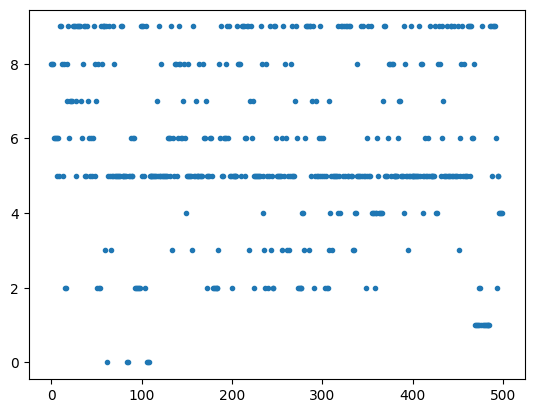

In [138]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [139]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

### Output
Recommendation of product based on the current product selected by user.
To recommend related product based on, Frequently bought together.

### Top words in each cluster based on product description

In [140]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 hp
 ink
 gb
 mb
 key
 country
 origin
 india
 japanese
 files
Cluster 1:
 warranty
 power
 product
 water
 jar
 cord
 steel
 year
 stainless
 easy
Cluster 2:
 wireless
 wpa
 ghz
 wi
 fi
 mbps
 band
 issue
 usb
 brand
Cluster 3:
 usb
 type
 enabled
 data
 reversible
 connector
 standard
 devices
 pixel
 charging
Cluster 4:
 mm
 notebook
 ear
 camera
 sound
 bass
 jack
 experience
 hours
 snapdragon
Cluster 5:
 charging
 charge
 iphone
 plus
 ipad
 devices
 cable
 batteries
 nylon
 fast
Cluster 6:
 mouse
 easy
 laptop
 ink
 inch
 battery
 use
 cm
 size
 quality
Cluster 7:
 hdmi
 cable
 audio
 supports
 video
 tv
 ethernet
 male
 devices
 xbox
Cluster 8:
 heating
 room
 heater
 element
 water
 isi
 safety
 heat
 pressure
 warranty
Cluster 9:
 usb
 cable
 micro
 pc
 speed
 drives
 peripherals
 signal
 male
 computer


### Predicting clusters based on key search words

In [141]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

Keyword : water heater

In [142]:
show_recommendations("water heater")

Cluster 8:
 heating
 room
 heater
 element
 water
 isi
 safety
 heat
 pressure
 warranty


Keyword : sound amplifier audio boost for sound booster

In [143]:
show_recommendations("sound amplifier audio boost for sound booster")

Cluster 6:
 mouse
 easy
 laptop
 ink
 inch
 battery
 use
 cm
 size
 quality


In case a word appears in multiple clusters, the algorithm chooses the cluster with the highest frequency of occurance of the word.

In [144]:
show_recommendations("iphone 15")

Cluster 5:
 charging
 charge
 iphone
 plus
 ipad
 devices
 cable
 batteries
 nylon
 fast


In [145]:
show_recommendations("water")

Cluster 1:
 warranty
 power
 product
 water
 jar
 cord
 steel
 year
 stainless
 easy


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.

#### Summary:
This works best if a business is setting up its e-commerce website for the first time and does not have user-item purchase/rating history to start with initally. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.